# Algo Trading Simulator!

## A very basic *algo trading* simulator, where you can input a stock ticker, and it will automtically calculate the crosses between the 50 and 20 day moving averages as a momentum advantage of when to buy or sell a stock, it is a widely popular technical indicator used by traders

### Importing important libraries in order to fully take advantage of Python to trade

In [1]:
!pip install watermark
!pip install yahoo_finance
!pip install pandas_datareader
!pip install quandl

     |████████████████████████████████| 133kB 5.3MB/s 
  Created wheel for yahoo-finance: filename=yahoo_finance-1.4.0-cp36-none-any.whl size=7234 sha256=e145e87089af6736d196ef9e40b3fc40c55a696c36b6c20874ff526d77b7ba02
  Stored in directory: /root/.cache/pip/wheels/58/77/5b/66026e0fa7af2ee5926a516a70d3df95e17f952c570bc5aee6
Successfully built yahoo-finance


In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import watermark
import yahoo_finance
import quandl

### Don't pay attention to google.colab, it is to upload data to the G-Suite

In [3]:
#Tool to upload a file into Google Colab faster and easier
#from google.colab import files
#uploaded = files.upload()

In [29]:
#Loading the stock info
ticker = input("Insert the ticker here to explore the stock:").upper()

#Dates are limited to available information within Yahoo! Finance
beginning_year = int(input("Write your beginning year here:"))
beginning_month = int(input("Write your beginning month here:"))
beginning_day = int(input("Write your beginning day here:"))

ending_year = int(input("Write your ending year here:"))
ending_month = int(input("Write your ending month here:"))
ending_day = int(input("Write your ending day here:"))

Insert the ticker here to explore the stock:PYPL
Write your beginning year here:2019
Write your beginning month here:1
Write your beginning day here:1
Write your ending year here:2021
Write your ending month here:2
Write your ending day here:4


In [30]:
print(f"{ticker} stock information from {beginning_year,beginning_month,beginning_day} up to {ending_year,ending_month,ending_day}")

PYPL stock information from (2019, 1, 1) up to (2021, 2, 4)


In [31]:
stock = pdr.get_data_yahoo(ticker, 
                          start=datetime.datetime(beginning_year,beginning_month, beginning_day), 
                          end=datetime.datetime(ending_year,ending_month, ending_day))
stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,86.199997,82.239998,82.379997,85.750000,10146200,85.750000
2019-01-03,84.750000,81.910004,84.360001,82.089996,9650700,82.089996
2019-01-04,86.910004,83.370003,83.709999,86.269997,9234800,86.269997
2019-01-07,87.550003,86.019997,86.419998,86.930000,11094100,86.930000
2019-01-08,88.894997,87.690002,88.110001,88.699997,8307600,88.699997


In [32]:
#Inspecting the dataset
#stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 528 entries, 2019-01-02 to 2021-02-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       528 non-null    float64
 1   Low        528 non-null    float64
 2   Open       528 non-null    float64
 3   Close      528 non-null    float64
 4   Volume     528 non-null    int64  
 5   Adj Close  528 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 28.9 KB


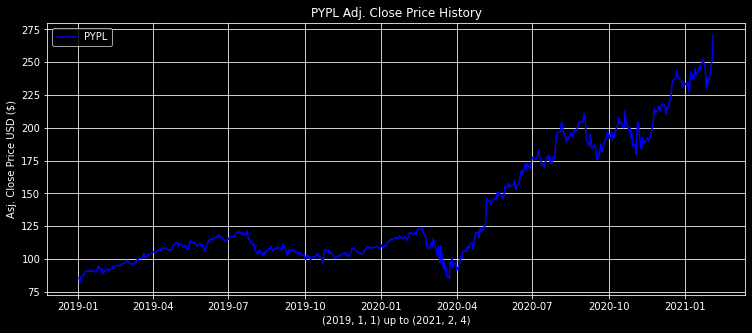

In [33]:
#Visualizing
plt.style.use("dark_background")
plt.figure(figsize=(12.5,5))
plt.plot(stock["Adj Close"], label = ticker, color = "blue")
plt.title(f"{ticker.upper()} Adj. Close Price History")
plt.xlabel(f"{beginning_year,beginning_month,beginning_day} up to {ending_year,ending_month,ending_day}")
plt.ylabel("Asj. Close Price USD ($)")
plt.legend(loc = "upper left")
plt.grid(True)
plt.show()

In [34]:
#Create the SMAs (Simple Moving Averages)
SMA13 = pd.DataFrame()
SMA13["Adj Close Price"] = stock["Adj Close"].rolling(window= 13).mean()
SMA20 = pd.DataFrame()
SMA20["Adj Close Price"] = stock["Adj Close"].rolling(window= 20).mean()
SMA50 = pd.DataFrame()
SMA50["Adj Close Price"] = stock["Adj Close"].rolling(window= 50).mean()
SMA200 = pd.DataFrame()
SMA200["Adj Close Price"] = stock["Adj Close"].rolling(window= 200).mean()

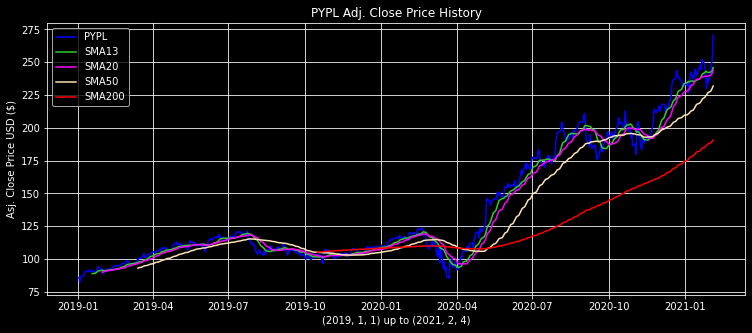

In [35]:
#Visualizing
plt.style.use("dark_background")
plt.figure(figsize=(12.5,5))
plt.plot(stock["Adj Close"], label = ticker, color = "blue")
plt.plot(SMA13["Adj Close Price"], label = "SMA13", color = "limegreen")
plt.plot(SMA20["Adj Close Price"], label = "SMA20", color = "magenta")
plt.plot(SMA50["Adj Close Price"], label = "SMA50", color = "moccasin")
plt.plot(SMA200["Adj Close Price"], label = "SMA200", color = "red")

plt.title(f"{ticker.upper()} Adj. Close Price History")
plt.xlabel(f"{beginning_year,beginning_month,beginning_day} up to {ending_year,ending_month,ending_day}")
plt.ylabel("Asj. Close Price USD ($)")
plt.legend(loc = "upper left")
plt.grid(True)
plt.show()

## In theory, a good signal to buy would be when the stock is above its 200 day MA and the 50 day MA, and the crossover between the 13 and 30 day MA is just about to happen 

### This is merely a momentum trading strategy, and by no means is a sound investment idea, but mereyly a speculation of the price regarding various variables


In [36]:
#Creating a Data Frame with all the Moving Averages in order to segment and analyze when they cross
data = pd.DataFrame()
data[ticker] = stock["Adj Close"]
data["SMA13"] = SMA13["Adj Close Price"]
data["SMA20"] = SMA20["Adj Close Price"]
data["SMA50"] = SMA50["Adj Close Price"]
data["SMA200"] = SMA200["Adj Close Price"]
data.head()

,PYPL,SMA13,SMA20,SMA50,SMA200
Date,,,,,
2019-01-02,85.750000,NaN,NaN,NaN,NaN
2019-01-03,82.089996,NaN,NaN,NaN,NaN
2019-01-04,86.269997,NaN,NaN,NaN,NaN
2019-01-07,86.930000,NaN,NaN,NaN,NaN
2019-01-08,88.699997,NaN,NaN,NaN,NaN


In [38]:
#Create a function to signal when to buy and sell the security
def buy_sell(data):
  price_to_buy = []
  price_to_sell = []
  flag = -1

  for i in range(len(data)):
    if data["SMA20"][i] > data["SMA50"][i]:
      if flag!= 1:
        price_to_buy.append(data[ticker][i])
        price_to_sell.append(np.nan)
        flag = 1
      else:
        price_to_buy.append(np.nan)
        price_to_sell.append(np.nan)
    elif data["SMA20"][i] < data["SMA50"][i]:
      if flag != 0:
          price_to_buy.append(np.nan)
          price_to_sell.append(data[ticker][i])
          flag = 0
      else:
          price_to_buy.append(np.nan)
          price_to_sell.append(np.nan)
    else:
      price_to_buy.append(np.nan)
      price_to_sell.append(np.nan)


  return(price_to_buy,price_to_sell)

In [39]:
#Store buy and sell data into a variable
buy_sell = buy_sell(data)
data["Buy_Signal_Price"] = buy_sell[0]
data["Sell_Signal_Price"] = buy_sell[1]

In [40]:
#Show the data
data

,PYPL,SMA13,SMA20,SMA50,SMA200,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,
2019-01-02,85.750000,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,82.089996,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,86.269997,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,86.930000,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08,88.699997,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-01-29,234.309998,242.102305,239.509499,226.831199,187.81475,NaN,NaN
2021-02-01,241.850006,242.426152,239.891999,227.822199,188.48245,NaN,NaN
2021-02-02,249.100006,242.749230,240.750999,229.001799,189.16870,NaN,NaN


# Because the data we have is from the daily adjusted price, we have to use the 20 and 50 day MA, they are regarded as the defacto movement detectors on the daily chart.

#### This is only with one stock, and we could add more studied in order to determine the perfect time when to buy and when to sell, like for example more mommentum indicators such as the MACD and the RSI, but it is a good starting point nonetheless.

#### If there is not enough days to create the SMA20 nor SMA50, the final graph will show an error (because the extracted data is daily)

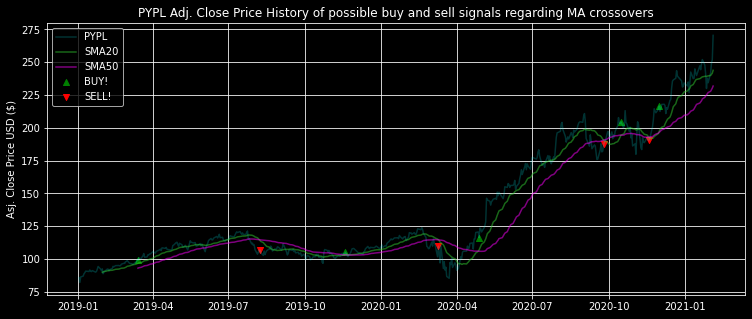

In [43]:
#Visualize
plt.figure(figsize=(12.5,5))
plt.plot(data.iloc[:,0], label = ticker, color = "cyan", alpha = 0.2)
plt.plot(data["SMA20"], label = "SMA20", color = "limegreen", alpha = 0.5)
plt.plot(data["SMA50"], label = "SMA50", color = "magenta", alpha = 0.5)
plt.scatter(data.index, data["Buy_Signal_Price"], label = "BUY!", marker = "^", color = "green")
plt.scatter(data.index, data["Sell_Signal_Price"], label = "SELL!", marker = "v", color ="red")
plt.title(f"{ticker} Adj. Close Price History of possible buy and sell signals regarding MA crossovers")
plt.ylabel("Asj. Close Price USD ($)")
plt.legend(loc = "upper left")
plt.grid(True)
plt.show()